### Librerias

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import triang

### Parametros de la distribucion triangular

In [51]:
# Parámetros de la distribución triangular original
a = 0      # límite inferior
b = 10     # límite superior
m = 4      # moda
c = (m - a) / (b - a)  # parámetro de forma (entre 0 y 1)

# Crear la distribución triangular con scipy.stats.triang
tri_dist = triang(c, loc=a, scale=(b - a))

In [52]:
def calc_percentil(per):
    return tri_dist.ppf(per)


# --- Distribución truncada con el rango de la primera desviación estándar ---
a = calc_percentil(0.1)
b = calc_percentil(0.7)

print(a,b)

2.0 5.757359312880714


### Graficar PDF Y CDF de la triangular

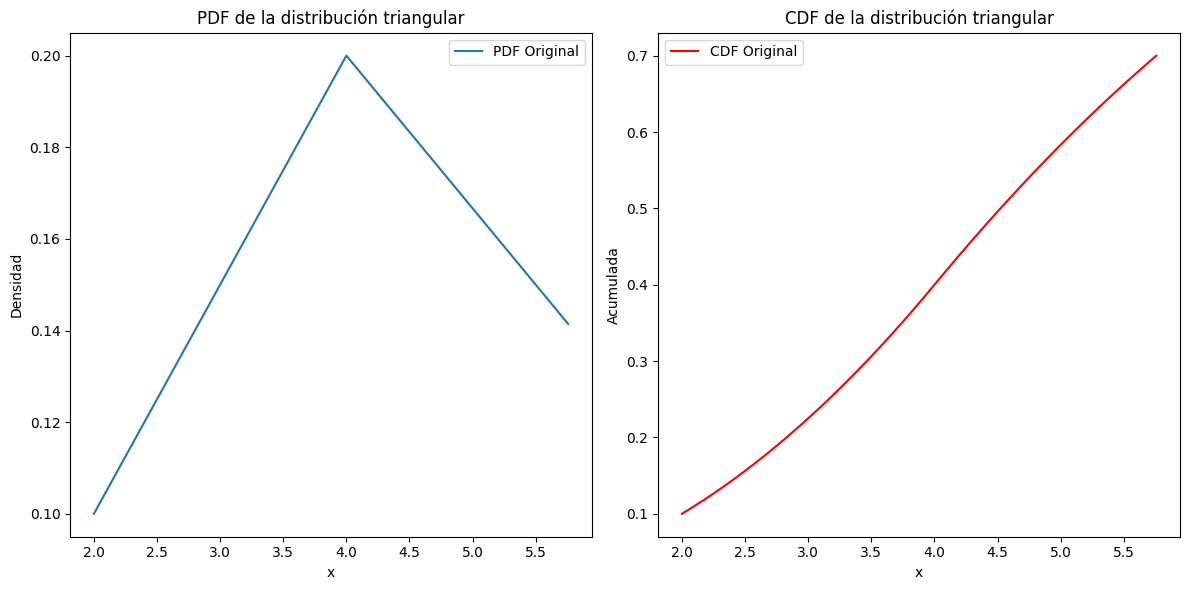

In [53]:
# Graficar PDF y CDF originales
x = np.linspace(a, b, 1000)
pdf_original = tri_dist.pdf(x)
cdf_original = tri_dist.cdf(x)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, pdf_original, label="PDF Original")
plt.title("PDF de la distribución triangular")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, cdf_original, label="CDF Original", color="red")
plt.title("CDF de la distribución triangular")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()

### Truncamiento

In [54]:
# --- Proceso de truncamiento ---
# Definimos el intervalo de truncamiento (debe estar dentro de [a, b])
d = 2   # límite inferior truncado
e = 8   # límite superior truncado

# Calculamos la probabilidad total en el intervalo [d, e] de la distribución original
cdf_d = tri_dist.cdf(d)
cdf_e = tri_dist.cdf(e)
norm_const = cdf_e - cdf_d  # constante de normalización

# Creamos las funciones de PDF y CDF truncadas re-normalizadas
x_trunc = np.linspace(d, e, 1000) # rango de valores truncados
pdf_trunc = tri_dist.pdf(x_trunc) / norm_const
cdf_trunc = (tri_dist.cdf(x_trunc) - cdf_d) / norm_const

### Graficar PDF Y CDF de la triangular truncada

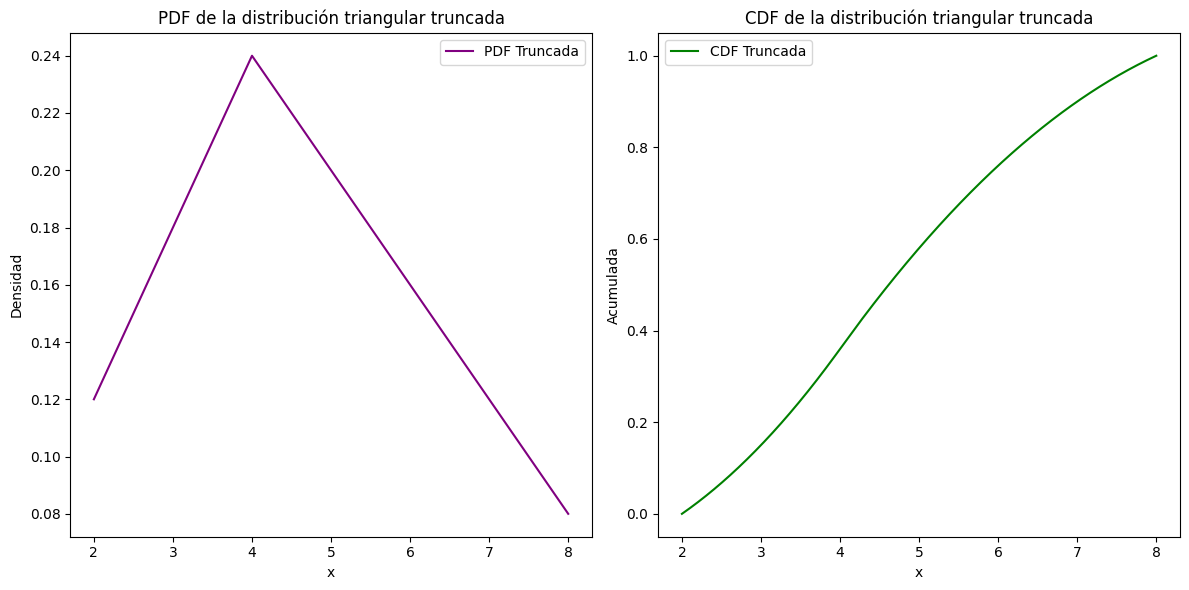

In [55]:
# Graficar PDF y CDF truncadas
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_trunc, pdf_trunc, label="PDF Truncada", color="purple")
plt.title("PDF de la distribución triangular truncada")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_trunc, cdf_trunc, label="CDF Truncada", color="green")
plt.title("CDF de la distribución triangular truncada")
plt.xlabel("x")
plt.ylabel("Acumulada")
plt.legend()

plt.tight_layout()
plt.show()


### Calculos de probabilidad

In [56]:
# Calcular probabilidad en la distribución triangular original de que X esté entre 3 y 7
p_original = tri_dist.cdf(7) - tri_dist.cdf(3)
print("Probabilidad en la distribución triangular original entre 3 y 7:", p_original)

# Calculamos la probabilidad en la distribución truncada de que X sea mayor a 5



Probabilidad en la distribución triangular original entre 3 y 7: 0.6249999999999999
